### Problem: The target variable is highly imbalanced
### Target Variable has two category:
###                                 1. Fraud- 1026
###                                 2. Not Fraud- 48974

In [ ]:
import numpy as np
import pandas as pd

In [2]:
loan_csv_path = "/kaggle/input/pan-card-realfake-image/loan_applications.csv"
txn_csv_path = "/kaggle/input/pan-card-realfake-image/transactions.csv"

In [3]:
loan_df = pd.read_csv(loan_csv_path)
txn_df = pd.read_csv(txn_csv_path)

In [4]:
loan_df.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


In [5]:
txn_df.head()

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [6]:
txn_agg = txn_df.groupby('customer_id').agg({
    'transaction_amount': ['sum','mean','max','min','std'],
    'transaction_id':'count',
    'is_international_transaction':'sum',
    'account_balance_after_transaction':['mean','min']
})
txn_agg.columns = ['_'.join(col).strip() for col in txn_agg.columns]
txn_agg.reset_index(inplace=True)

df = loan_df.merge(txn_agg, on='customer_id', how='left')

In [8]:
df.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,fraud_type,transaction_amount_sum,transaction_amount_mean,transaction_amount_max,transaction_amount_min,transaction_amount_std,transaction_id_count,is_international_transaction_sum,account_balance_after_transaction_mean,account_balance_after_transaction_min
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,NaN,13700.0,6850.000000,8800.0,4900.0,2757.716447,2.0,0.0,8332.500000,0.0
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,NaN,18700.0,4675.000000,9800.0,900.0,3730.393187,4.0,0.0,31553.750000,13656.0
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,NaN,13100.0,3275.000000,7600.0,300.0,3607.746296,4.0,0.0,31112.250000,18545.0
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,NaN,2900.0,1450.000000,2200.0,700.0,1060.660172,2.0,0.0,11021.500000,1476.0
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,NaN,35600.0,11866.666667,18500.0,3300.0,7782.244749,3.0,0.0,24092.333333,0.0


In [9]:
df.shape

(50000, 30)

In [10]:
print(df['fraud_flag'].value_counts())

fraud_flag
0    48974
1     1026
Name: count, dtype: int64


In [11]:
df=df.drop('transaction_amount_std',axis=1)

In [12]:
 from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
df.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,fraud_flag,fraud_type,transaction_amount_sum,transaction_amount_mean,transaction_amount_max,transaction_amount_min,transaction_id_count,is_international_transaction_sum,account_balance_after_transaction_mean,account_balance_after_transaction_min
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,0,NaN,13700.0,6850.000000,8800.0,4900.0,2.0,0.0,8332.500000,0.0
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0,NaN,18700.0,4675.000000,9800.0,900.0,4.0,0.0,31553.750000,13656.0
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,0,NaN,13100.0,3275.000000,7600.0,300.0,4.0,0.0,31112.250000,18545.0
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,0,NaN,2900.0,1450.000000,2200.0,700.0,2.0,0.0,11021.500000,1476.0
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,0,NaN,35600.0,11866.666667,18500.0,3300.0,3.0,0.0,24092.333333,0.0


In [14]:
df = df.drop(columns=['application_id', 'customer_id', 'application_date']) 

In [15]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   loan_type                               50000 non-null  int64  
 1   loan_amount_requested                   50000 non-null  float64
 2   loan_tenure_months                      50000 non-null  int64  
 3   interest_rate_offered                   50000 non-null  float64
 4   purpose_of_loan                         50000 non-null  int64  
 5   employment_status                       50000 non-null  int64  
 6   monthly_income                          50000 non-null  float64
 7   cibil_score                             50000 non-null  int64  
 8   existing_emis_monthly                   50000 non-null  float64
 9   debt_to_income_ratio                    50000 non-null  float64
 10  property_ownership_status               50000 non-null  in

In [17]:
leaky_cols = ['fraud_type', 'account_balance_after_transaction_mean', 'account_balance_after_transaction_min']
df = df.drop(columns=leaky_cols)

In [18]:
df = df.drop(columns=['transaction_id_count', 'residential_address'])

In [19]:
missing_values = df.isnull().sum()
print(missing_values)

loan_type                           0
loan_amount_requested               0
loan_tenure_months                  0
interest_rate_offered               0
purpose_of_loan                     0
employment_status                   0
monthly_income                      0
cibil_score                         0
existing_emis_monthly               0
debt_to_income_ratio                0
property_ownership_status           0
applicant_age                       0
gender                              0
number_of_dependents                0
loan_status                         0
fraud_flag                          0
transaction_amount_sum              0
transaction_amount_mean             0
transaction_amount_max              0
transaction_amount_min              0
is_international_transaction_sum    0
dtype: int64


In [20]:
df.head()

,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,...,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,transaction_amount_sum,transaction_amount_mean,transaction_amount_max,transaction_amount_min,is_international_transaction_sum
0,0,604000.0,12,11.66,4,1,34700.0,714,1100.0,3.17,...,28,0,3,0,0,13700.0,6850.000000,8800.0,4900.0,0.0
1,1,100000.0,240,13.62,2,5,51600.0,667,0.0,0.00,...,44,2,3,0,0,18700.0,4675.000000,9800.0,900.0,0.0
2,2,431000.0,60,11.40,4,3,14800.0,808,4600.0,31.08,...,56,2,4,0,0,13100.0,3275.000000,7600.0,300.0,0.0
3,1,324000.0,120,10.36,1,3,28800.0,647,4000.0,13.89,...,27,2,4,1,0,2900.0,1450.000000,2200.0,700.0,0.0
4,4,100000.0,36,14.14,0,2,43900.0,624,1100.0,2.51,...,50,2,0,1,0,35600.0,11866.666667,18500.0,3300.0,0.0


In [21]:
df.shape

(50000, 21)

In [22]:
y = df["fraud_flag"]
X = df.drop(columns=["fraud_flag"])

In [23]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Separate minority class
X_minority = X_scaled[y == 1]

input_dim = X_minority.shape[1]
latent_dim = 10  # can tune

### Using Varitional Autoencoder 

In [25]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.mu = nn.Linear(32, latent_dim)
        self.log_var = nn.Linear(32, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.mu(h), self.log_var(h)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_recon = self.decode(z)
        return x_recon, mu, log_var

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(input_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [29]:
X_tensor = torch.tensor(X_minority, dtype=torch.float32).to(device)

In [33]:
epochs=500

In [34]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    recon, mu, log_var = model(X_tensor)
    recon_loss = loss_fn(recon, X_tensor)
    kl_loss = -0.5 * torch.mean(1 + log_var - mu.pow(2) - log_var.exp())
    loss = recon_loss + 0.001 * kl_loss  # KL term weighted
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f}")

Epoch [10/500] Loss: 2.0304
Epoch [20/500] Loss: 1.5495
Epoch [30/500] Loss: 1.3609
Epoch [40/500] Loss: 1.2796
Epoch [50/500] Loss: 1.1931
Epoch [60/500] Loss: 1.0780
Epoch [70/500] Loss: 0.9655
Epoch [80/500] Loss: 0.9101
Epoch [90/500] Loss: 0.8747
Epoch [100/500] Loss: 0.8267
Epoch [110/500] Loss: 0.7670
Epoch [120/500] Loss: 0.7129
Epoch [130/500] Loss: 0.6678
Epoch [140/500] Loss: 0.6229
Epoch [150/500] Loss: 0.5821
Epoch [160/500] Loss: 0.5464
Epoch [170/500] Loss: 0.5253
Epoch [180/500] Loss: 0.4997
Epoch [190/500] Loss: 0.4804
Epoch [200/500] Loss: 0.4659
Epoch [210/500] Loss: 0.4488
Epoch [220/500] Loss: 0.4289
Epoch [230/500] Loss: 0.4147
Epoch [240/500] Loss: 0.4070
Epoch [250/500] Loss: 0.4014
Epoch [260/500] Loss: 0.3966
Epoch [270/500] Loss: 0.3915
Epoch [280/500] Loss: 0.3850
Epoch [290/500] Loss: 0.3760
Epoch [300/500] Loss: 0.3633
Epoch [310/500] Loss: 0.3531
Epoch [320/500] Loss: 0.3476
Epoch [330/500] Loss: 0.3436
Epoch [340/500] Loss: 0.3393
Epoch [350/500] Loss: 0

### Generating Synthetic data 

In [35]:
model.eval()
num_synthetic = 48000  
z = torch.randn(num_synthetic, latent_dim).to(device)
synthetic_samples = model.decode(z).detach().cpu().numpy()

In [36]:
# Inverse scale
synthetic_samples = scaler.inverse_transform(synthetic_samples)
synthetic_df = pd.DataFrame(synthetic_samples, columns=X.columns)
synthetic_df["fraud_flag"] = 1

In [37]:
X_majority = df[y == 0].copy()
final_df = pd.concat([X_majority, synthetic_df], ignore_index=True)
print("✅ Final balanced dataset shape:", final_df.shape)
print(final_df["fraud_flag"].value_counts())

✅ Final balanced dataset shape: (96974, 21)
fraud_flag
0    48974
1    48000
Name: count, dtype: int64


In [39]:
final_df.head()

,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,...,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,transaction_amount_sum,transaction_amount_mean,transaction_amount_max,transaction_amount_min,is_international_transaction_sum
0,0.0,604000.0,12.0,11.66,4.0,1.0,34700.0,714.0,1100.0,3.17,...,28.0,0.0,3.0,0.0,0,13700.0,6850.000000,8800.0,4900.0,0.0
1,1.0,100000.0,240.0,13.62,2.0,5.0,51600.0,667.0,0.0,0.00,...,44.0,2.0,3.0,0.0,0,18700.0,4675.000000,9800.0,900.0,0.0
2,2.0,431000.0,60.0,11.40,4.0,3.0,14800.0,808.0,4600.0,31.08,...,56.0,2.0,4.0,0.0,0,13100.0,3275.000000,7600.0,300.0,0.0
3,1.0,324000.0,120.0,10.36,1.0,3.0,28800.0,647.0,4000.0,13.89,...,27.0,2.0,4.0,1.0,0,2900.0,1450.000000,2200.0,700.0,0.0
4,4.0,100000.0,36.0,14.14,0.0,2.0,43900.0,624.0,1100.0,2.51,...,50.0,2.0,0.0,1.0,0,35600.0,11866.666667,18500.0,3300.0,0.0


In [40]:
final_df.shape

(96974, 21)

In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop(columns=["fraud_flag"]), 
    final_df["fraud_flag"], 
    test_size=0.3, 
    random_state=42
)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ensure X_train has only numeric columns
X_numeric = X_train.select_dtypes(include=[float, int]).copy()

vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                             feature        VIF
7                        cibil_score  94.958591
16           transaction_amount_mean  90.000638
17            transaction_amount_max  48.362335
3              interest_rate_offered  45.915247
11                     applicant_age  18.914311
18            transaction_amount_min  15.016016
15            transaction_amount_sum  14.594819
6                     monthly_income  13.994448
8              existing_emis_monthly   9.516431
1              loan_amount_requested   6.676139
9               debt_to_income_ratio   5.868578
13              number_of_dependents   4.760440
5                  employment_status   4.662695
12                            gender   4.514208
0                          loan_type   4.265316
10         property_ownership_status   4.251647
4                    purpose_of_loan   4.145096
2                 loan_tenure_months   3.507952
14                       loan_status   2.379559
19  is_international_transaction_sum   1

### Dropping high VIF variables

In [52]:
high_vif_features = [
    'cibil_score', 
    'transaction_amount_mean', 
    'transaction_amount_max', 
    'transaction_amount_min',
    'transaction_amount_sum', 
    'interest_rate_offered', 
    'monthly_income', 
    'existing_emis_monthly',
    'loan_amount_requested', 
    'debt_to_income_ratio', 
    'applicant_age'
]

X_train_low_vif = X_train.drop(columns=high_vif_features)
X_test_low_vif = X_test[X_train_low_vif.columns]  

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_low_vif)
X_test_scaled = scaler.transform(X_test_low_vif)

## Fit logistic regression

In [54]:
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [55]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}\n")

# Classification Report
print("📊 Classification Report:\n", classification_report(y_test, y_test_pred))


✅ Train Accuracy: 0.8981
✅ Test Accuracy:  0.8952

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     14773
           1       0.83      0.98      0.90     14320

    accuracy                           0.90     29093
   macro avg       0.91      0.90      0.89     29093
weighted avg       0.91      0.90      0.89     29093



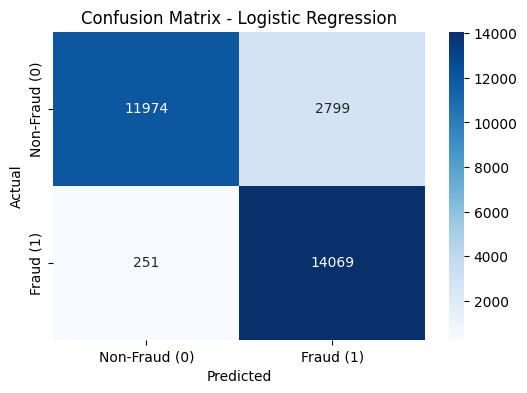

In [57]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

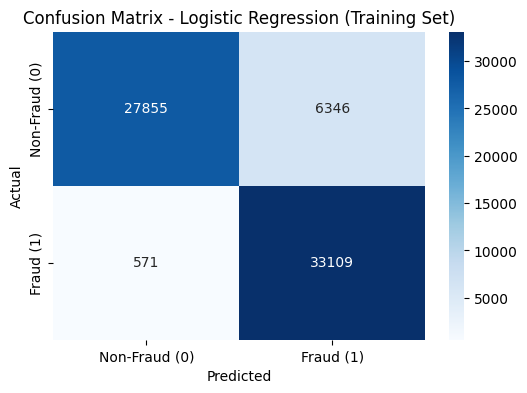

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_train,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
    yticklabels=['Non-Fraud (0)', 'Fraud (1)']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Training Set)')
plt.show()

## So we have fixed the problem of imbalanced data , by this process we can increase the precision and reall , F1 score , not just the accuracy